In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

### Wstęp teoretyczny 

Hipoteza statystyczna to każde stwierdzenie dotyczące nieznanego rozkładu zmiennej losowej. Jeśli hipotetyzujemy parametry rozkładu, to hipozteza jest parametryczna, w przeciwnym wypadku jest nieparametryczna. Jeśli hipoteza w całości opisuje dany rozkład (np. przypuszczamy, że \$ \lambda = 2\$ w rozkładzie Poissona), to hipoteza jest prosta. W przeciwnym wypadku (np. przypuszczamy, że \$ \lambda > 2\$) hipoteza jest złożona. 

Logika jest następująca: wysuwamy hipotezę, zwaną hipotezą zerową \$ H_0 \$ oraz 'dopełniającą' ją hipotezę alternatywną \$ H_1 \$. Na podstawie próby chcemy wnioskować o populacji i mamy dwa scenariusze: 
1. Odrzucamy hipotezę, bo próba dostarczyła wystarczająco informacji
2. Nie odrzucamy hipotezy, bo próba nie dostarczyła wystarczająco informacji 

Obieramy odpowiednią statystykę \$ \theta \$ i konstruujemy obszar krytyczny \$ R_{\alpha} \$.  

Ustalamy z góry pewne małe prawdopodobieństwo, \$ \alpha \$, które jest zwane poziomem istotności. Jest to prawdopodobieństwo popełnienia błędu I rodzaju, który polega na odrzuceniu hipotezy \$ H_0 \$, gdy jest ona prawdziwa.

\$ P(\theta \in R_{\alpha} | H_0) = \alpha \$

Jako że tylko odrzucenie hipotezy zerowej stawia nas w konkretnej sytuacji, to eksperyment tworzymy w ten sposób, by hipotezą zerową było stwierdzenie, co do którego fałszywości jesteśmy bardziej przekonani. 

### Testy dotyczące wartości oczekiwanej

#### Badanie wartości średniej populacji 
###### Model 1

Założenia 
1. \$ X \sim N(\mu, \sigma) \$
2. \$ \sigma \$ jest znane
3. n, \$ \alpha \$

Stawiamy hipotezę
\$ H_0: \mu = \mu_0\$

1. \$ H_1: \mu \neq \mu_0\$
\$ R_{\alpha} = (- \infty, u(\frac{\alpha}{2})) \cup (u(1 - \frac{\alpha}{2}), \infty)\$

2. \$ H_1: \mu \le \mu_0\$
\$ R_{\alpha} = (- \infty, u(\alpha)) \$

3. \$ H_1: \mu \ge \mu_0\$
\$ R_{\alpha} = (u(1 - \alpha), \infty)\$

W dwóch ostatnich przypadkach wybieramy przedziały jednostronne, bo wtedy moc testu (prawdopodobieństwo odrzucenia \$ H_0 \$, gdy \$ H_1 \$ jest prawdziwa) jest największa. 

Statystyką testową jest 

$$ U = \frac{\overline X - \mu}{\frac{\sigma}{\sqrt{n}}}$$

która ma rozkład w normalny. 

Przykład testu:
Z populacji o rozkładzie normalnym \$ N(\mu, 1) \$ pobrano próbę \$ n = 16 \$ elementów. Średnia wyszła 0.1, a naszą hipotezą jest
\$ H_0: \mu = 0 \$. Zbadać wobec hipotezy alternatywnej \$ H_1: \mu \neq 0 \$

In [2]:
from scipy.stats import norm
sample_mean = 0.1
hypothesized_mean = 0
pop_std = 1
n = 16
alpha = 0.01

stat = (sample_mean - hypothesized_mean) / (pop_std / np.sqrt(n))

q1 = norm.ppf(1 - alpha / 2)
q2 = norm.ppf(alpha / 2)

stat < q2 or stat > q1

False

Nie mamy więc podstaw do odrzucenia hipotezy zerowej

###### Model 2

Założenia 
1. \$ X \sim N(\mu, \sigma) \$
2. \$ \sigma \$ jest nieznane
3. n, \$ \alpha \$

Stawiamy hipotezę
\$ H_0: \mu = \mu_0 \$

1. \$ H_1: \mu \neq \mu_0\$
\$ R_{\alpha} = (- \infty, t(\frac{\alpha}{2}, n - 1)) \cup (t(1 - \frac{\alpha}{2}, n - 1), \infty)\$

2. \$ H_1: \mu \le \mu_0\$
\$ R_{\alpha} = (- \infty, t(\alpha, n - 1)) \$

3. \$ H_1: \mu \ge \mu_0\$
\$ R_{\alpha} = (t(1 - \alpha, n - 1), \infty)\$

$$ U = \frac{\overline X - \mu}{S}\sqrt{n - 1}$$

która ma rozkład t-Studenta o n - 1 stopniach swobody.

Przykład testu:
Z próby n = 10 elementów obliczono \$ \overline x = 4.8 \$, \$ s = 0.5 \$. Na poziomie istotności \$ \alpha = 0.01 \$ zweryfikować hipotezę

\$ H_0: \mu = 5\$
wobec hipotezy
\$ H_1: \mu \neq 5 \$

In [3]:
from scipy.stats import t
sample_mean = 4.8
hypothesized_mean = 5
sample_std = 0.5
n = 10
alpha = 0.01

tq = t.ppf(1 - alpha / 2, n - 1)

t_stat = (sample_mean - hypothesized_mean) / sample_std * np.sqrt(n - 1)

t_stat < - tq or t_stat > tq

False

In [4]:
print(t_stat)
# nie ma podstaw do odrzucenia hipotezy, że średnia jest 
# równa 5.0

-1.200000000000001


###### Model 3

Założenia 
1. \$ X \$ ma dowolny rozkład
2. \$ \sigma \$ jest nieznane
3. \$ n \geq 100 \$ , \$ \alpha \$

Korzystamy wtedy z modelu 1, bo z centralnego twierdzenia granicznego wynika, że rozkład średniej \$ \overline X \sim N(\mu, \frac{\sigma}{\sqrt{n}})\$, jednak jeśli nie znamy odchylenia populacji \$ \sigma \$, to podstawiamy odchylenie z próby

Przykład testu
Dzienne zużycie wody w fabryce podlega wahaniom losowym. Na podstawie n = 315 obserwacji stwierdzono, że \$ \overline x = 1029 \$, \$ s^2 = 191 \$. Na poziomie istotności \$ \alpha = 0.05 \$ zbadać prawdziwość hipotezy

\$ H_0: \mu = 1000\$
wobec hipotezy
\$ H_1: \mu \ge 1000 \$

In [5]:
sample_mean = 1029
hypothesized_mean = 1000
pop_var = 191
n = 100
alpha = 0.05

stat = (sample_mean - hypothesized_mean) / (np.sqrt(pop_var) / np.sqrt(n))

q = norm.ppf(1 - alpha / 2)

stat > q

True

Możemy więc odrzucić hipotezę zerową na poziomie istotności 0.05 - średnia jest więc większa niż 1000

#### Badanie różnicy średniej dwóch populacji

###### Model 1

Założenia
1. \$ X \sim N( \mu_1, \sigma_1), Y \sim N( \mu_2, \sigma_2) \$
2. \$ \sigma_1, \sigma_2 \$ są znane 
3. \$ n_1, n_2, \alpha \$

Statystyką jest

$$ U = \frac{(\overline X - \overline Y) - (\mu_1 - \mu_2)}{\sqrt{\frac{\sigma_1^2}{n_1} + \frac{\sigma_2^2}{n_2}}} $$

która przy prawdziwości hipotezy zerowej ma rozkład \$ N(0, 1) \$

Stawiamy hipotezę
\$ H_0: \mu_1 - \mu_2 = d_0 \$

1. \$ H_1: \mu_1 - \mu_2 \neq d_0 \$
\$ R_{\alpha} = (- \infty, u(\frac{\alpha}{2})) \cup (u(1 - \frac{\alpha}{2}), \infty)\$

2. \$ H_1: \mu_1 - \mu_2 < d_0 \$
\$ R_{\alpha} = (- \infty, u(\alpha)) \$

3. \$ H_1: \mu_1 - \mu_2 > d_0 \$
\$ R_{\alpha} = (u(1 - \alpha), \infty)\$

gdy badamy równość średnich, to oczywiście \$ d_0 = 0\$

Przykładowy test:


##### Model 2

Wysunięto hipotezę, że stopien wyprania tkaniny wełnianej płatkami mydlanymi jest wyższy od stopnia wyprania sulfapolem. W tym celu pobrano próbkę o \$n_1 = 10\$ i wartościach 74.8, 75.1, 73.0, 72.8, 76.2, 74.6, 76.0, 73.4, 72.9, 71.6, oraz próbkę o \$n_2 = 7\$ i wartościach 56.9, 57.8, 54.6, 59.0, 57.1, 58.2, 57.6. Zakładając, że stopien wyprania tkaniny ma rozkład normalny, zweryfikować na poziomie \$\alpha = 0.05 \$ hipotezę. 

Rozwiązanie 

- \$H_0 = \mu_1 - \mu_2 = 0\$
- \$A = \mu_1 - \mu_2 > 0\$

gdzie przez \$\mu_1\$ oznaczamy średni stopień wyprania tkanin wypranych płatkami mydlanymi. 

In [6]:
n1 = 10
n2 = 7
alpha = 0.05

arr1 = np.array([74.8, 75.1, 73.0, 72.8, 76.2, 74.6, 76.0, 73.4, 72.9, 71.6])
arr2 = np.array([56.9, 57.8, 54.6, 59.0, 57.1, 58.2, 57.6])

mean1 = arr1.mean()
mean2 = arr2.mean()

var1 = arr1.var(ddof=0)
var2 = arr2.var(ddof=0)

print(f"Population 1: mean = {mean1}, variance = {var1}")
print(f"Population 2: mean = {mean2}, variance = {var2}")

Population 1: mean = 74.04, variance = 2.0804000000000005
Population 2: mean = 57.31428571428571, variance = 1.6469387755102034


Nie znamy odchyleń standardowych populacji, więc chcielibyśmy skorzystać ze statystyki 

\$ t = \frac{(\overline X_1 - \overline X_2) - d_0}{\sqrt{\frac{((n_1 - 1) S_1^{2} + (n_2 - 1) S_2^{2})(n_1 + n_2)}{(n_1 + n_2 - 2)(n_1 n_2)}}}\$

Jednak nie wiemy, czy \$ \sigma_1 = \sigma_2 \$.
W tym celu wykonamy najpierw test równości wariancji. Bez wchodzenia w szczegóły testu (będzie o nim potem) obliczamy wartość statystyki rozkładu F

\$ F = \frac{\frac{n_1}{n_1 - 1}S_1}{\frac{n_2}{n_2 - 1}S_2}\$ 

Która przy prawdziwości hipotezy H_0 ma rozkład F Snedecora o (n_1 - 1, n_2 - 1) stopniach swobody 

\$ F = max(F, F') = \frac{\max{S_1^{\ast2} S_2^{\ast2}}}{\min{S_1^{\ast2} S_2^{\ast2}}}\$


Dla hipotezy \$A = \sigma_1 \neq \sigma_2\$ zbiorem krytycznym jest \$ <F(1 - \frac{\alpha}{2}, n_l - 1, n_m - 1); +\infty) \$

gdzie \$ n_l \$ jest licznością dla której obliczono licznik a \$ n_m \$ dla której obliczono mianownik

Warto zauważyć, że jeżeli zawsze bierzemy w liczniku większą wartość, to interesuje nas prawy ogon rozkładu

In [7]:
from scipy.stats import f

F = (n1 / (n1 - 1) * np.sqrt(var1)) / (n2 / (n2 - 1) * np.sqrt(var2))
critical_set = f.ppf(1 - (alpha/2), n1 - 1, n2 - 1)
print(F, " > ", critical_set, "?")

1.070398264149241  >  5.523406623975584 ?


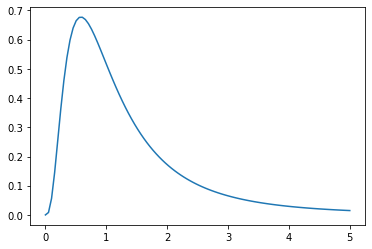

In [8]:
x = np.linspace(0, 5, 100)

plt.plot(x, f.pdf(x, n1 - 1, n2 - 1))

Obliczona wartość F nie należy do zbioru krytycznego, więc nie możemy odrzucić hipotezy o równości wariancji.

W takim razie przechodzimy do weryfikacji głównej hipotezy tego zadania.

In [9]:
def t_stat(x, y):
    x_mean, x_var = x.mean(), x.var(ddof=0)
    y_mean, y_var = y.mean(), y.var(ddof=0)
    n1, n2 = len(x), len(y)
    
    nominator = (x_mean - y_mean)
    denominator = np.sqrt(((n1 - 1) * x_var + (n2 - 1) * y_var) / (n1 + n2 - 2) * (1 / n1 + 1 / n2))
    
    return nominator / denominator

t_computed = t_stat(arr1, arr2)
print(t_computed)

24.577183973799897


Jako zbiór krytyczny przyjmujemy \$<t(1 - \alpha; n_1 + n_2 - 2); \infty)\$

In [10]:
from scipy.stats import t 

critical_set = t.ppf(1 - alpha, n1 + n2 - 2)
critical_set

1.7530503556925547

In [11]:
t_computed > critical_set

True

Możemy więc odrzucić hipotezę zerową na poziomie istotności 0.05

#### Badanie równości średnich - metoda zmiennych połączonych

Zmierzono ciśnienie tętnicze wśród losowo wybranej grupy pacjentów przed i po podaniem leku. Otrzymano wyniki

przed: 210, 180, 260, 270, 190, 250, 180

po: 180, 160, 220, 260, 200, 230, 180

Na poziomie istotności \$ \alpha = 0.05 \$ zweryfikować, czy lek działa. 

Będziemy korzystać z modelu testu, gdzie pobieramy próbkę \$x_1, ..., x_n\$ z populacji o rozkładzie normalnym przed pewnym eksperymentem, a następnie próbkę \$y_1, ..., y_n\$ (w tej samej kolejności). 
Badamy zmienną \$ Z = X - Y\$, więc hipoteza \$ \mu_X - \mu_Y = 0 => \mu_Z = 0\$

Korzystamy ze statystyki 

\$ t = \frac{\overline Z}{S_Z} \sqrt{n - 1}\$

która ma rozkład t-Studenta o n - 1 stopniach swobody

Stawiamy hipotezy:

- \$H_0 : \mu_Z = 0\$
- \$A : \mu_Z > 0\$

przedziałem krytycznym jest \$<t(1 - \alpha; n - 1); \infty)\$

In [13]:
alpha = 0.05
X = np.array([210, 180, 260, 270, 190, 250, 180])
Y = np.array([180, 160, 220, 260, 200, 230, 180])

def t_paired(x, y):
    z = x - y 
    n = len(z)
    return (z.mean()) / (z.std(ddof=0)) * (np.sqrt(n - 1))

t_computed = t_paired(X, Y)
t_computed

2.419677397852329

In [14]:
from scipy.stats import t
t_computed > t.ppf(1 - alpha, n - 1)

True

Możemy więc odrzucić hipotezę zerową na rzecz hipotezy alternatywnej - wyniki badań przemawiają za działaniem leku

Wykonano pomiary wytrzymałości betonu dla dwóch różnych receptur A i B. Otrzymano wyniki (niżej). Na poziomie istotności 0.01 zbadać, czy wytrzymałość zależy od receptury. 

In [58]:
A = np.array([20, 33, 35, 25, 30,27])
B = np.array([28, 30, 33, 20, 24, 18])

alpha = 0.01
n = len(A)

t_comp = t_paired(A, B)
print("statistic = ", t_comp)
(t_comp < t.ppf(alpha / 2, n - 1)) or (t_comp > t.ppf(1 - alpha / 2, n - 1))

statistic =  1.187331502808283


False

Nie mamy więc podstaw do odrzucenia hipotezy zerowej, tj. stwierdzenia, że wytrzymałość nie zależy od metody, na przyjętym poziomie istotności.

In [16]:
# możliwe byłoby też wykorzystanie testu na porównanie
# dwóch średnich, ale jest on chyba słabszy / nie stosuje
# się, gdy zmienne nie są niezależne
t_stat(A, B)

0.9461494390267176

In [17]:
from scipy.stats import chi2

print(chi2.ppf(alpha, n))
print(chi2.ppf(1 - alpha, n))

0.8720903301565863
16.811893829770927


Sprawdzić, czy rzeczywiście dla dużych n mamy \$ \sqrt{\frac{2nS^2}{\sigma_0^2}}  \sim  N(\sqrt{2n - 3}, 1)\$

Wysunięto hipotezę, że muzyka przy warsztatach pracy zwiększa wydajność pracy zatrudnionych na pewnym 
stanowisku roboczym. W celu sprawdzenia tej hipotezy wylosowano grupę 8 robotników i zmierzono im wydajność pracy 
przed i po umieszczeniu przy ich stanowiskach głośników, z których nadawano cicho muzykę rozrywkową. Wyniki [liczba 
sztuk na godzinę] przed zainstalowaniem głośników były następujące: 35, 20, 40, 30, 38, 42, 30, 22, a po zainstalowaniu 
głośników: 36, 24, 52, 46, 44, 50, 40, 48. Zakładając, że wydajność pracy ma rozkład normalny, zweryfikować na poziomie 
istotności 0,05 hipotezę, że wydajność pracy przy muzyce wzrasta. 

Wykorzystamy do tego dwa podejścia - najpierw test, który porównuje równość średnich, a potem test sparowany

In [18]:
X = np.array([35, 20, 40, 30, 38, 42, 30, 22])
Y = np.array([36, 24, 52, 46, 44, 50, 40, 48])

x_mean, x_std = X.mean(), X.std(ddof=0)
y_mean, y_std = Y.mean(), Y.std(ddof=0)

alpha = 0.05
n = 8

Pierwsze podejście zaczniemy od testu na równość wariancji 

$$ H_0 : \sigma_1^2 = \sigma_2^2 $$
$$ H_1 : \sigma_1^2 \neq \sigma_2^2 $$

In [19]:
def f_stat(s1, s2, n1, n2):
    sn, sd, nn, nd = s1, n1, s2, n2
    if s1 < s2:
        sn, sd, nn, nd = s2, n2, s1, n1
        
    return (nn / (nn - 1) * sn ** 2) / (nd / (nd - 1) * sd ** 2)

f_comp = f_stat(x_std, y_std, n, n)
 
from scipy.stats import f

f_comp > f.ppf(1 - alpha / 2, n - 1, n - 1)

False

Nie odrzucamy więc hipotezy o równości wariancji

Badamy więc wartości przeciętne

$$ H_0 : \mu_1 = \mu_2 $$
$$ H_1 : \mu_1 \lt \mu_2 $$

obszarem krytycznym jest \$ (\infty; t(\alpha)) \$

In [20]:
df = n + n - 2
t_comp = t_stat(X, Y)
t_comp < t.ppf(alpha, df)

True

więc średnie po 'eksperymencie' jest większa - możemy na poziomie istotniości 0.05 stwierdzić, że muzyka zwiększa wydajność pracowników

### Testy dotyczące wartości wariancji

#### Badanie wartości wariancji

In [21]:
finch_beaks = pd.read_csv('data/finch_beaks_2012.csv')

In [22]:
finch_beaks.head()

,band,species,blength,bdepth
0,19022,fortis,10.0,8.5
1,19028,fortis,12.5,8.9
2,19032,fortis,9.3,7.5
3,19041,fortis,10.3,9.6
4,19044,fortis,11.0,9.2


<AxesSubplot:xlabel='bdepth', ylabel='Density'>

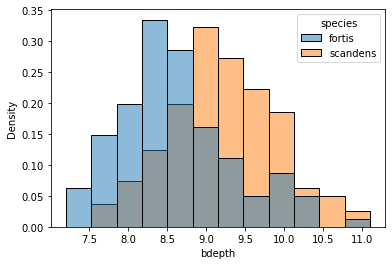

In [23]:
sns.histplot(x='bdepth', data=finch_beaks, hue='species',
            stat='density')

Postawmy hipotezę dla zmiennej bdepth \$ H_0: \sigma_{fortis}^2 = 1\$ oraz \$A: \sigma_{fortis}^2 > 1\$. Na podstawie histogramu przyjmujemy, że rozkład jest w przybliżeniu normalny.
Poziom istotności przyjmujemy \$ \alpha = 0.05\$

Dla testów o wartości wariancji posługujemy się statystyką \$ \chi^2 = \frac{nS^2}{\sigma_0^2}\$ która przy prawdziwości hipotezy zerowej ma rozkład \$ \chi^2\$ o n - 1 stopniach swobody

Przedziałem krytycznym dla testu prawostronnego jest \$ <\chi^2(1 - \alpha, n - 1); \infty)\$

In [24]:
from scipy.stats import chi2

alpha = 0.05
hypothesized_var = 1
sample = finch_beaks.loc[finch_beaks['species'] == 'fortis', 'bdepth']
n = len(sample)
var_f = sample.var()
chi2_stat = n * var_f / hypothesized_var

chi2_stat > chi2.ppf(1 - alpha, n - 1)

False

Nie odrzucamy więc hipotezy zerowej 

W tablicach podane są kwantyle rozkładu \$ \chi^2\$ zwykle do liczności próby 30/50. Aby obliczyć kwantyle wyższych stopni swobody, możemy posłużyć się zależnością

\$ (\chi^2)_p = \frac{1}{2}(\sqrt{2n - 1} + \lambda_p)^2 \$

gdzie \$ \lambda_p\$ jest kwantylem rozkładu \$ N(0, 1) \$

\$ F(\lambda_p) = p => 0.5 + \Phi(\lambda_p) => \Phi(\lambda_p) = p - 0.5$

In [25]:
lambda_05 = -1.64

chi2_05 = 0.5 * ((np.sqrt(2 * n - 1) + lambda_05) ** 2)
print(chi2_05, chi2.ppf(0.05, n - 1))

96.38515349813356 95.70463704168404


In [26]:
k = 100
bootstrap = np.empty(k)

for i in range(k):
    bootstrap[i] = np.var(np.random.choice(sample, size=n))

In [27]:
standardized = np.sqrt(2 * n * bootstrap / hypothesized_var) - np.sqrt(2 * n - 3)

(array([ 1.,  6., 12., 10., 25.,  8., 15., 12.,  7.,  4.]),
 array([-6.1648827 , -5.8047372 , -5.44459169, -5.08444619, -4.72430069,
        -4.36415519, -4.00400969, -3.64386419, -3.28371869, -2.92357319,
        -2.56342769]),
 <BarContainer object of 10 artists>)

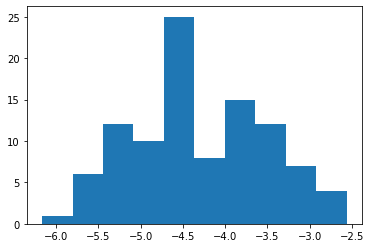

In [28]:
plt.hist(standardized)

Pewne wyniki pomiarów mają rozkład normalny o nieznanych parametrach. Otrzymano wyniki (niżej). Na poziomie istotności 0.05 zbadać, czy \$ \sigma^2 = 0.06 \$

In [29]:
x = np.array([18.17, 18.21, 18.05, 18.14, 18.19, 18.22, 18.06, 18.08])

print(x.mean())
print(x.var(ddof=0))

alpha = 0.05

def chi2_stat(x, hypothesized_var):
    n = len(x)
    return n * x.var(ddof=0) / hypothesized_var

chi2_comp = chi2_stat(x, 0.06)

chi2_comp > chi2.ppf(1 - alpha, len(x) - 1)

18.14
0.004100000000000057


False

nie mamy podstaw do odrzucenia hipotezy o wartości wariancji równej 0.06

#### Badanie równości wariancji dwóch populacji

Tak jak to wcześniej zostało wspomniane, do werfikacji równości wariancji korzystamy ze statystyki 

\$ F = \frac{\frac{n_1}{n_1 - 1}S_1^2}{\frac{n_2}{n_2 - 1}S_2^2}\$ 

Która przy prawdziwości hipotezy \$ H_0\$ ma rozkład F Snedecora o \$(n_1 - 1, n_2 - 1)\$ stopniach swobody 

\$ H_0: \sigma_1^2 = \sigma_2^2 \$

1. \$ A: \sigma_1^2 > \sigma_2^2\$

wtedy zbiorem krytycznym jest 
\$ <F(1 - \alpha, n_1 - 1, n_2 - 1); +\infty) \$

2. \$ A: \sigma_1^2 < \sigma_2^2\$

naszą statystyką jest wtedy \$ F' = \frac{1}{F} \$

a zbiorem krytycznym jest 
\$ <F(1 - \alpha, n_2 - 1, n_1 - 1); +\infty) \$

3. \$ A: \sigma_1^2 \neq \sigma_2^2\$

wtedy obliczamy

\$ F = max(F, F') = \frac{\max{S_1^{\ast2} S_2^{\ast2}}}{\min{S_1^{\ast2} S_2^{\ast2}}}\$

zbiorem krytycznym jest \$ <F(1 - \frac{\alpha}{2}, n_l - 1, n_m - 1); +\infty) \$

gdzie \$ n_l \$ jest licznością dla której obliczono licznik a \$ n_m \$ dla której obliczono mianownik

przy obliczaniu kwantyli korzystać możemy z zależności 

\$ F_{p, n, m} = \frac{1}{F_{1 - p, m, n}}\$

Ale jeśli korzystamy z wyżej podanych przedziałów krytycznych, to nie trzeba z tego wzoru korzystać

Postawmy hipotezę dotyczącą równości wariancji dwóch populacji \$ H_0: \sigma_1^2 = \sigma_2^2 \$, gdzie \$ A: \sigma_1^2 \neq \sigma_2^2 \$ na poziomie istotności \$ \alpha = 0.05 \$

In [30]:
alpha = 0.05
sample1 = finch_beaks.loc[finch_beaks['species'] == 'fortis', 'bdepth']
sample2 = finch_beaks.loc[finch_beaks['species'] == 'scandens', 'bdepth']

# ddof=1 domyślnie
var1 = np.var(sample1)
var2 = np.var(sample2)

if var1 >= var2:
    F_computed = var1 / var2
    nl, nm = n1, n2
else:
    F_computed = var2 / var1
    nl, nm = n2, n1

from scipy.stats import f

critical_set = f.ppf(1 - alpha/2, nl - 1, nm - 1)
F_computed > critical_set

False

Nie odrzucamy więc hipotezy zerowej o równości wariancji

In [31]:
weather_station = pd.read_csv('data/sheffield_weather_station.csv', 
                             comment='#', sep='\s+')

#### Badanie równości wariancji >= 3 populacji

Aby móc użyć testu Bartletta, rozkłady muszą być normalne. 
W tym celu pobrane zostały próby bootstrapowe i obliczone średnie, bo z centralnego prawa granicznego wynika, że rozkład średnich będzie miał aproksymowany rozkład normalny

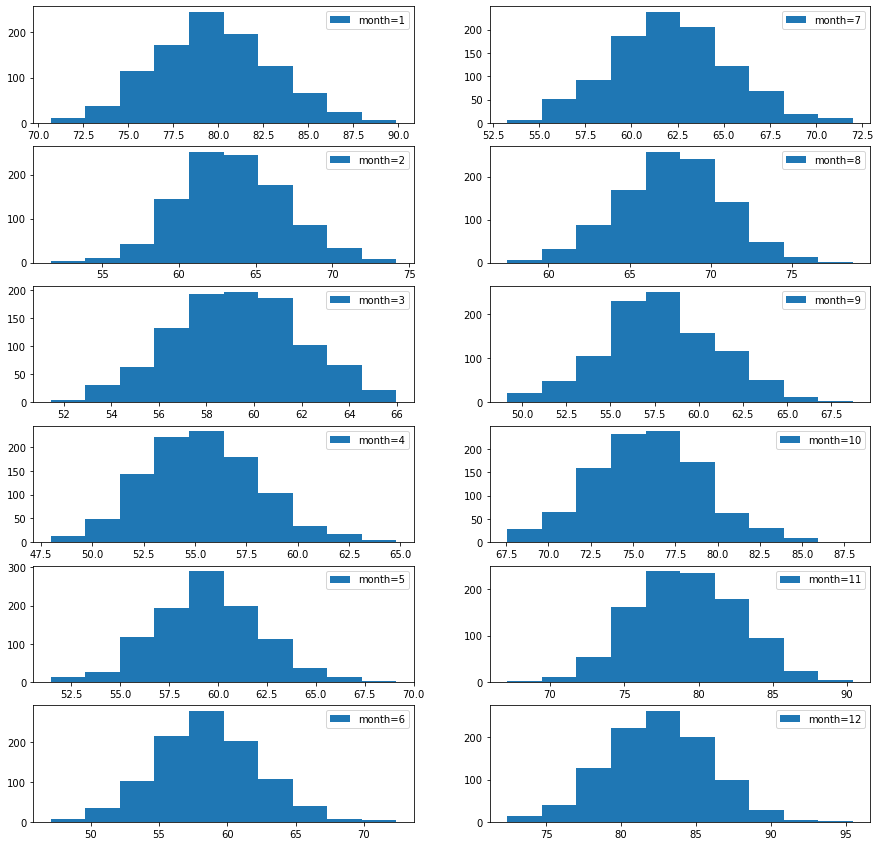

In [32]:
def bootstrap(data, size=1000, stat_fun=np.mean):
    n = len(data)
    return np.array([stat_fun(np.random.choice(data, size=n)) for _ in range(size)])


bootstrap_season_rain = []
for season in range(1, 13):
    sample = weather_station.loc[weather_station['mm'] == season, 'rain']
    bootstrap_season_rain.append(bootstrap(sample))

rows = 6
cols = 2
fig, axes = plt.subplots(6, 2, figsize=(15, 15))

for r in range(rows):
    for c in range(cols):
        month = r + c * 6
        axes[r][c].hist(bootstrap_season_rain[month], label=f"month={month + 1}")
        axes[r][c].legend()

In [33]:
sizes = []
for season in range(1, 13):
    sizes.append(len(weather_station.loc[weather_station['mm'] == season]
))
sizes

[134, 134, 134, 134, 134, 134, 133, 133, 133, 133, 133, 133]

Bez przytaczania wzoru, przy założeniu że próby są równej liczności obliczamy wartości nieobciążonej wariancji dla każdej próby, \$ S^{\ast^2}_i, i = 1, ..., k\$ i statystykę \$ \chi^2 \$ (wzór niżej) która będzie miała dla nawet małych prób ( >= 6) rozkład \$ \chi^2 \$ o \$ k -1 \$ stopniach swobody. 

\$ H_0: \sigma^2_1 = \sigma^2_2 = ... = \sigma^2_k\$

\$ A: \$ dla pewnych \$ i, j\$  \$\sigma^2_i \neq \sigma^2_j \$

In [34]:
alpha = 0.05
s_n = 133
k = 12
def c(sample_size, k):
    if isinstance(sample_size, int):
        n = k * sample_size
        return 1 + (k + 1) / (3 *(n - k))
    else:
        n = np.sum(sample_size)
        v = np.sum(1 / (sample_size - 1))
        return 1 + (v - 1 / (n - k)) / (3 * (k - 1))

def chi_compute(sample_size, k, variances):
    if isinstance(sample_size, int):
        n = sample_size * k
    else:    
        n = np.sum(sample_size)
    v = (n - k) * np.log(np.sum((sample_size - 1) * variances) / (n - k)) - np.sum((sample_size - 1) * np.log(variances)) 
    return 2.303 * v / c(sample_size, k)

variances = [np.var(bootstrap_season_rain[season]) for season in range(12)]
chi_computed = chi_compute(np.array(sizes), k, variances)

In [35]:
from scipy.stats import chi2

critical_set = chi2.ppf(1 - alpha, k - 1)
chi_computed > critical_set

True

In [36]:
chi_computed

76.951831560676

Więc odrzucamy hipotezę o równości wariancji 

#### Badanie równości wskaźnika struktury dwóch populacji

Chcemy zbadać populacje ze względu na procent populacji posiadający daną cechę. W tym przypadku zakładamy, że badanym rozkładem jest rozkładem dwumianowym. 

Obie populacje muszą mieć liczności \$ n_1, n_2 > 100\$

Wtedy, na podstawie integralnego prawa Moivre'a Laplace'a wynika, że zmienna \$ U = \frac{\frac{M}{n} - p}{\sqrt{\frac{p(1 - p)}{n}}} \sim N(0, 1)\$

W naszym przypadku jako statystykę przyjmujemy zmienną 

\$ Z = \frac{\frac{M_1}{n_1} - \frac{M_2}{n_2}}{\sqrt{\frac{p_0(1 - p_0)}{n}}}\$

\$ p_0 = \frac{M_1 + M_2}{n_1 + n_2}\$

\$ n = \frac{n_1 n_2}{n_1 + n_2}\$

Więc dla hipotez alternatywnych przedziały krytyczne obliczamy jako
1. \$ A: p_1 \neq p_2 \$

\$ (-\infty; -u(1 - \frac{\alpha}{2})> i <u(1 - \frac{\alpha}{2}); \infty)\$

i odpowiednio dla lewostronnego i prawostronnego testu. 

Zakładamy, że w dwóch powiatach przeprowadzono badania w farmach na temat tego, czy dana farma ma konia, czy nie. W powiecie A na 1500 badanych 300 miało konie, w powiecie B na 1800 - 320. Czy proporcje te są równe a fluktuacje są przypadkowe? Poziom ufności to 0.05

\$ H_0: p_1 = p_2 \$

\$ A: p_1 \neq p_2 \$

In [37]:
from scipy.stats import norm
alpha = 0.05
n1, n2 = 1500, 1800
m1, m2 = 300, 320

p1 = m1 / n1
p2 = m2 / n2

n = (n1 * n2) / (n1 + n2)
p_0 = (m1 + m2) / (n1 + n2)

Z = (p1 - p2) / np.sqrt(p_0 * (1 - p_0) / n)

print(Z, "is < ", norm.ppf(alpha), " or >", norm.ppf(1 - alpha))

1.6272830338387814 is <  -1.6448536269514729  or > 1.6448536269514722


Nie odrzucamy więc hipotezy zerowej

#### Test na zgodność \$ \chi^2 \$ Pearson'a

Test ten bada hipotezę zerową
\$ H_0: F(x) = F_0(x)\$, która dotyczy rozkładu zmiennej. Postępowanie polega na podziale wartości na \$ k \$ klas o końcach przedziału \$ <a_0, a_1>, ..., <a_k, a_{k + 1}> \$ i przypisaniu im częstości hipotetyzowanych \$ p_i = F(a_{i + 1}) - F(a_i)\$ 

Wtedy, gdy \$ n -> \infty \$ statystyka 

\$ \chi^2 = \sum_{i=0}^k \frac{(n_i - np_i)^2}{np_i} \$

ma rozkład \$ \chi^2 \$ o \$ k - 1\$ stopniach swobody

Jeżeli parametry \$ \theta_1, ..., \theta_l \$ od których zależy rozkład nie są znane, to musimy je estymować. Wykorzystuje się wtedy metodę np. największej wiarygodności. Wtedy, dla \$ n -> \infty \$ statystyka ma rozkład \$ \chi^2 \$ o \$ k - l - 1\$ stopniach swobody

Zalecane jest taki podział na klasy, by prawdopodobieństwa każdej klasy były takie same, tj
\$ p_i = \frac{1}{k}\$ 

Jednak należy znać kwantyle tego rozkładu, gdyż dla i-tej klasy lewą granicę klasy obliczamy jako 
\$ F(a_{i}) = \frac{i}{k}, i = 1, 2, ..., k\$

Zastosujmy test do weryfikacji hipotezy dotyczącej emisji cząstek \$ \alpha \$, tj. hipotetyzujemy, że cząstki mają rozkład Poissona. 

In [38]:
alpha = 0.05
k = 10
l = 1
n = 2608
particles_emitted = np.arange(k + 1)
observed_counts = np.array([ 57, 203, 383, 525, 532, 
                            408, 273, 139, 45, 27, 16,])

Jako że nie znamy parametru \$ \lambda\$, to będziemy go estymować na podstawie próby. Metodą największej wiarygodności wynika, że estymatorem \$ \hat \lambda = \overline X \$

In [39]:
lmbd = np.sum(observed_counts * particles_emitted) / n
lmbd

3.8673312883435584

In [40]:
from scipy.stats import poisson

probabilities = poisson.pmf(particles_emitted, lmbd)
theoretical_counts = n * probabilities

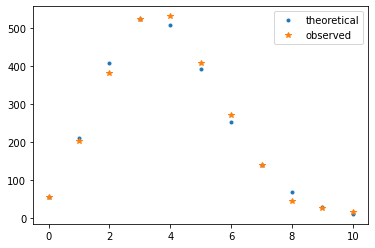

In [41]:
plt.plot(particles_emitted, theoretical_counts, marker='.', linestyle='none', label='theoretical')
plt.plot(particles_emitted, observed_counts, marker='*', linestyle='none', label='observed')
plt.legend()

In [42]:
chi_computed = np.sum((observed_counts - n * probabilities) ** 2 / (n * probabilities))

przedziałem krytycznym przy poziomie istotności \$ \alpha = 0.05 \$ jest \$ <\chi^2(1 - \alpha, k - l - 1); \infty)\$

In [43]:
from scipy.stats import chi2
print(chi_computed)

chi_computed > chi2.ppf(1 - alpha, k - l - 1)

14.861965399714498


False

nie odrzucamy więc hipotezy, że rozkład zmiennej jest rozkładem Poissona. 

#### Test Kołmogorowa

Weryfikujemy hipotezę, że cecha ciągła X ma rozkład określony przez dystrybuantę \$ F_0(x) \$. 
Jako statystykę przyjmujemy

$$ D_n = \sup_x |F_0(x) - S_n(x)|$$

gdzie operator sup oznaczna dla zbiorów najmniejszą wartość mniejszą lub równą od wszystkich wartości ze zbioru. 

\$ S_n(x) \$ jest dystrybuantą empiryczną stworzoną na podstawie uszeregowanego zbioru wartości \$ x_1  \leq x_2 \leq ... x_n \$

Warto zauważyć, że statystyka jest miarą rozbieżności między dystrybuantą empiryczną a teoretyczną.

Sensem wyboru statystyki \$ D_n \$ jest twierdzenie Gliwienki 

$$ P(\lim_{n -> \infty}S_n(x) = F_0(x) | H_0) = 1$$

Przy prawdziwości hipotezy \$ H_0 \$ statystyka ma rozkład niezależny od przyjętej hipotezy. Posługujemy się kwantylami \$ P(D_n \geq d_n(1 - \alpha)) = \alpha\$

W praktyce postępujemy tak, że obliczamy granice prawo i lewo-stronne, tj.

\$d_n^- = \max |F_0(x) - \frac{i - 1}{n}|\$

\$d_n^+ = \max |\frac{i}{n} - F_0(x)|\$

i wtedy \$ d_n = max(d_n^-, d_n^+)\$

gdy obliczona statystyka należy do przedziału \$ <d_n(1 - \alpha); 1)\$, to odrzucamy hipotezę zerową. Warto podkreślić, że wszystkie parametry rozkładu muszą być określone.

Jeśli natomiast parametry nie są znane, tj \$ H_0: X \sim F_0(x, \theta_1, ... , \theta_l)\$, to
są one estymowane na podstawie próbki, a korzystamy z granicznej statystyki

\$ P(\sqrt{n}D_n \geq \lambda(1 - \alpha)) = \alpha\$

Gdy n jest dostatecznie duże (rzędu kilkaset)

Hipotetyzujemy, że na przestrzeni lat maksymalne temperatury w styczniu pochodzą z rozkładu normalnego o znanej średniej i wariancji. 

In [44]:
def convert_to_numeric(month, col):
    return pd.to_numeric(weather_station.loc[weather_station['mm'] == month, col], errors='coerce').dropna()

max_temps_january = convert_to_numeric(1, 'tmax')
years = weather_station.loc[max_temps_january.index, 'yyyy']

Text(0.5, 1.0, 'Maximum January temperature')

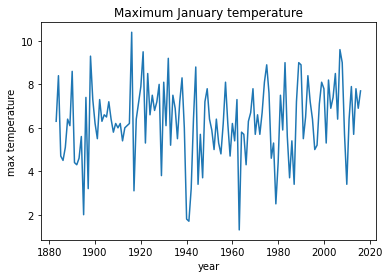

In [45]:
plt.plot(years, max_temps_january)
plt.xlabel('year')
plt.ylabel('max temperature')
plt.title('Maximum January temperature')

(array([ 4.,  2.,  8., 10., 25., 34., 20., 18.,  9.,  3.]),
 array([ 1.3 ,  2.21,  3.12,  4.03,  4.94,  5.85,  6.76,  7.67,  8.58,
         9.49, 10.4 ]),
 <BarContainer object of 10 artists>)

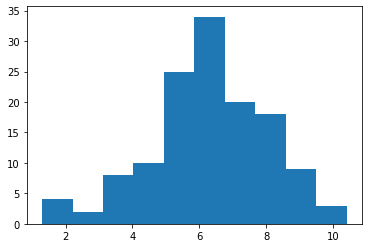

In [46]:
plt.hist(max_temps_january)

Zakładamy, że temperatury pochodzą z rozkładu normalnego

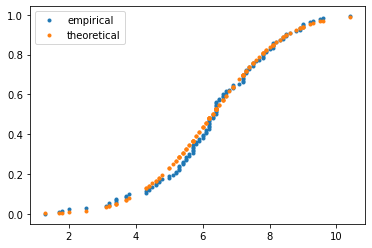

In [47]:
from scipy.stats import norm

mean_max_temp = max_temps_january.mean()
std_max_temp = max_temps_january.std()

def ecdf(x):
    x = sorted(x)
    n = len(x)
    k = np.arange(n)
    y = k / n
    return x, y

x, y = ecdf(max_temps_january)
plt.plot(x, y, marker='.', linestyle='none', label='empirical')
plt.plot(x, norm.cdf(x, mean_max_temp, std_max_temp), marker='.', linestyle='none', label='theoretical')
plt.legend(loc=0)

In [48]:
n = len(max_temps_january)
print(n)
i = np.arange(1, n + 1)
d_n_plus = max(abs((i / n) - norm.cdf(x, mean_max_temp, std_max_temp)))
d_n_minus = max(abs(norm.cdf(x, mean_max_temp, std_max_temp) - (i - 1) / n))

print(f"d_n_plus = {d_n_plus}, d_n_minus = {d_n_minus}")
d_n = max(d_n_plus, d_n_minus)
d_n

133
d_n_plus = 0.06074106367043541, d_n_minus = 0.06825986066291662


0.06825986066291662

In [49]:
from scipy.stats import ksone

alpha = 0.05
d_n > ksone.ppf(1 - alpha, n)

False

Więc test nie przeczy hipotezie, że rozkład jest normalny

Warto zauważyć, że tak naprawdę nie znamy parametrów tego rozkładu, więc odpowiednie dla tego testu twierdzenie nie może być spełnione. Więc korzystamy z aproksymowanego rozkładu 

In [50]:
from scipy.stats import kstwobign

np.sqrt(n) * d_n > kstwobign.ppf(1 - alpha)

False

######  Porównanie testów Kołmogorowa i \$ \chi^2 \$
1. Jeżeli liczność n próbki jest mała (nawet rzędu kilku) i cecha jest ciągła, to należy stosować test Kołmogorowa
2. Przy podziale na klasy o tych samych prawdopodobieństwach, liczności >= kilkadziesiąt i cecha jest ciągła, to należy stosować test Kołmogorowa
3. Gdy cecha ma rozkład skokowy, stosujemy \$ \chi^2 \$
4. Test Kołmogorova jest czulszy na obliczane różnice

#### Test Shapiro-Wilka

https://www.itl.nist.gov/div898/handbook/prc/section2/prc213.htm

(Nie ma rozkładu dla tego testu w scipy, więc już bez wzoru)

\$ H_0 : X \sim N(\mu, \sigma)\$

Jest to test na normalność. Jako przedział krytyczny przyjmujemy \$ (0; W(\frac{\alpha}{2}, n))\$ i \$ (W(1 - \frac{\alpha}{2}, n); \infty)\$

In [51]:
from scipy.stats import shapiro

alpha = 0.05
shapiro(max_temps_january).pvalue

0.09210717678070068

#### Test Smirova-Kołmogorowa

Jest to test badający równość rozkładów dwóch zmiennych. Zakładamy, że mają one dowolny rozkład oraz odpowiednio duże liczności. Postępowanie jest podobne jak w teście Kołmogorova.
Statystyką testową jest

$$ D_{n1, n2} = \sup_x |S_{n_1} - S_{n_2}(x)|$$

wtedy asymptotycznie statystyka

\$ \lambda = \sqrt{n} D_{n1, n2}\$ gdzie \$ n = \frac{n_1n_2}{n_1 + n_2}\$

ma rozkład Kołmogorova

Zbiorem krytycznym jest \$ <\lambda(1 - \alpha); \infty>\$

(array([[ 5., 13., 36., 49., 26.,  4.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  8., 24., 55., 34., 10.,  2.]]),
 array([ 1.3 ,  2.88,  4.46,  6.04,  7.62,  9.2 , 10.78, 12.36, 13.94,
        15.52, 17.1 ]),
 <a list of 2 BarContainer objects>)

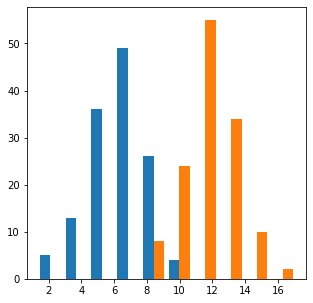

In [52]:
month
max_temps_april = convert_to_numeric(4, 'tmax')

fig, ax = plt.subplots(figsize=(5, 5))

# ?? Bo to zparowane wtedy będą 
# temps = pd.DataFrame(max_temps_january).join(max_temps_april, lsuffix='tmax1', rsuffix='tmax4')
ax.hist([max_temps_january, max_temps_april])

In [53]:
n1 = len(max_temps_january)
n4 = len(max_temps_april)

assert n1 == n4

t1, ecdf1 = ecdf(max_temps_january)
t4, ecdf4 = ecdf(max_temps_april)

D_n = max(abs(ecdf1 - ecdf4))

n = n1 * n4 / (n1 + n4)

lmbd = np.sqrt(n) * D_n

In [54]:
lmbd > kstwobign.ppf(1 - alpha)

False

więc odrzucamy hipotezę zerową, że rozkłady są takie same

#### Test Wilcoxona

Jest to test na identyczność rozkładów dwóch populacji. Schemat postępowania jest następujący: oznaczmy przez \$ x \$ wartości pierwszego z rozkładów, a przez \$ y \$ wartości drugiego. Jeżeli teraz uporządkujemy wartości we wspólny, uporządkowany ciąg 

$$ x_1 \leq ... x_{k1} \leq y_1 \leq ... y_{k2} \leq x_{k2 + 1} \leq ... $$

zmienną losową \$ U_x \$ jest liczba inwersji elementów \$ x \$ ze względu na \$ y \$, tj dla konkretnego \$ x \$ obliczamy, ile elementów \$ y \$ go poprzedza. 

Można wykazać, że

\$ U_x + U_y = n_1n_2\$

dla \$ n_1, n_2 \geq 4, n_1 + n_2 \geq 20\$ statystyka \$ U \sim N(\frac{n_1n_2}{2}, \sqrt{\frac{n_1n_2(n_1 + n_2 + 1)}{12}})\$

Hipotezę zerową odrzucamy, gdy \$ u \leq u_{\alpha} \$

In [55]:
animals = pd.read_csv('data/animals.txt', sep='\t', header=0, names=['gender', 'wrong', 'necessar'])
animals.head()

,gender,wrong,necessar
0,2,3,5
1,2,2,7
2,2,3,5
3,2,5,5
4,2,6,4


In [56]:
women_wrong = animals.loc[animals['gender'] == 1, ['gender', 'wrong']]
men_wrong = animals.loc[animals['gender'] == 2, ['gender', 'wrong']]

ranking = animals.sort_values(by='wrong').reset_index(drop=True)
# .loc[animals['gender'] == 2]

In [57]:
# u = (women_wrong < men_wrong)